# Machine Predictive Maintenance Classification

## ----------------- Machine Learning Project -----------------
  ### ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎  ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ 2022/23

* Alice Mangara - 2020242411
* João Fernandes - 2021219036

## Data import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix, balanced_accuracy_score, precision_score, recall_score #Evaluation Metrics
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

from sklearn.svm import SVC


In [2]:
data = pd.read_csv('predictive_maintenance.csv')


## Data Analysis

In [3]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
data['Failure Type'] = scaler.fit_transform(data['Failure Type'])
data['Type'] = scaler.fit_transform(data['Type'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  int32  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int32  
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 703.2+ KB


In [5]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1


In [6]:
data.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,1.039000
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.379069
min,1.00000,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.000000
50%,5000.50000,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,1.000000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,1.000000
max,10000.00000,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,5.000000


In [8]:
data.dtypes

UDI                          int64
Product ID                  object
Type                         int32
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int32
dtype: object

In [5]:
data.apply(lambda c: len(c.unique()), axis = 0)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [6]:
# UDI e Product ID são únicos para cada observação  ,portanto não vão contribuir para a análise
data = data.drop(["UDI","Product ID"],axis = 1)

In [11]:
# verificar nulos
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

###### *Visualização*

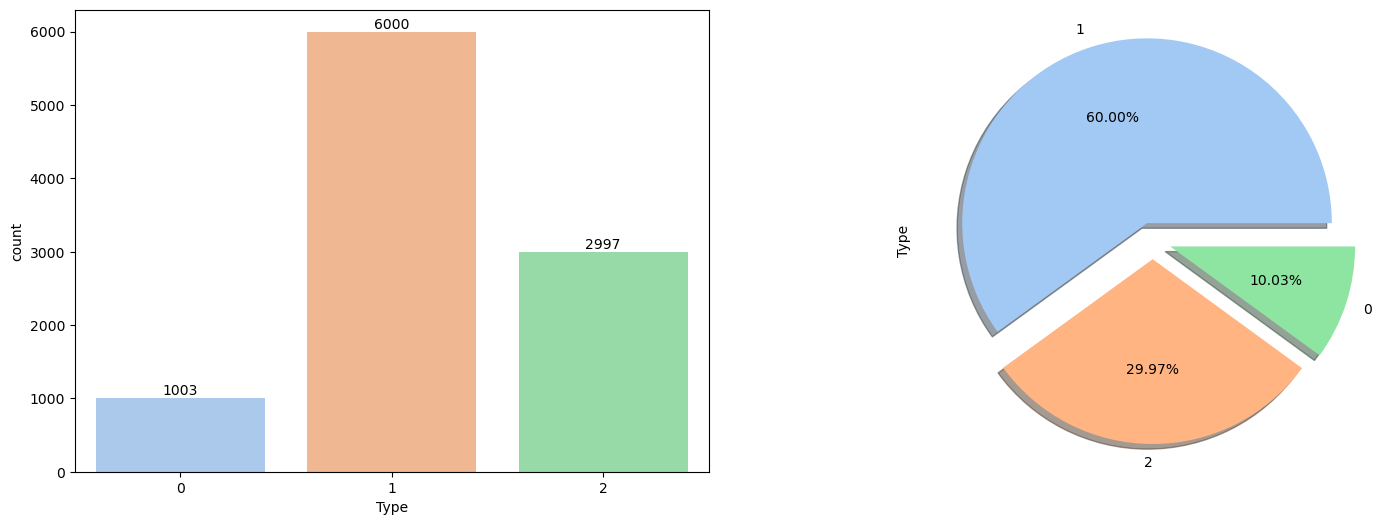

In [12]:
# Visualizar o Type
fig, axes = plt.subplots(figsize=(18, 6))
axes.set_title("Type", fontsize=20, color='Red', fontname='Times New Roman')

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Type', data=data, palette='pastel')
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(1, 2, 2)
data['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=sns.color_palette('pastel'), ax=ax2)

plt.show()


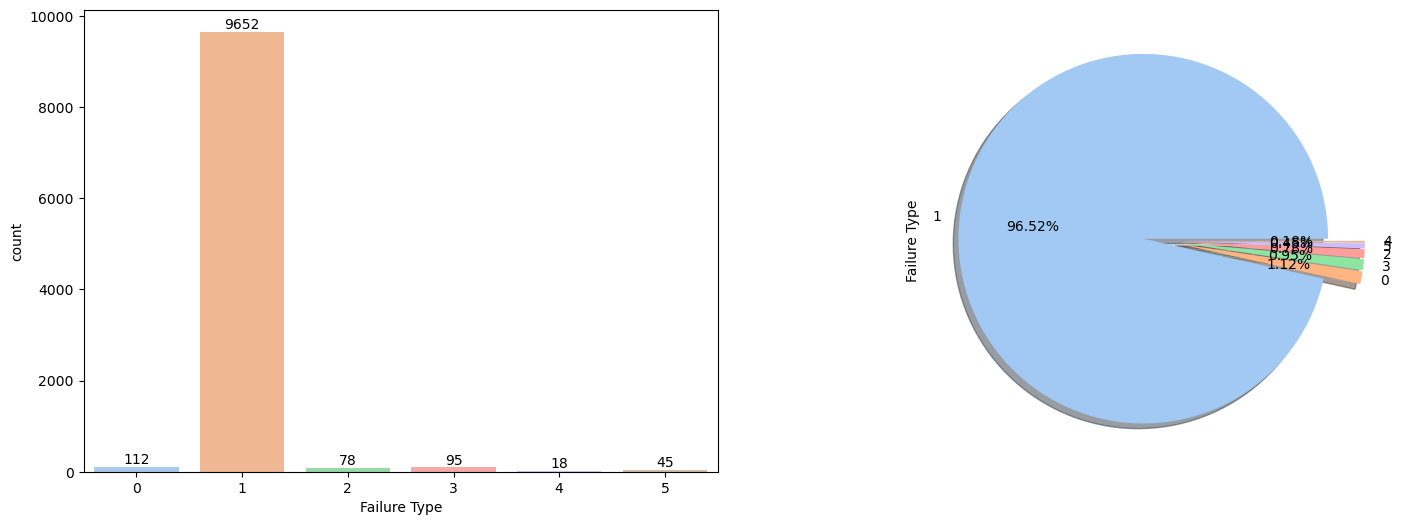

In [13]:
# Visualizar o Failure_Type
fig, axes = plt.subplots(figsize=(18, 6))
axes.set_title("Failure Type", fontsize=20, color='Red', fontname='Times New Roman')

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Failure Type', data=data, palette='pastel')
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(1, 2, 2)
data['Failure Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1,0.1,0.1,0.1], autopct='%1.2f%%', shadow=True, colors=sns.color_palette('pastel'), ax=ax2)

plt.show()

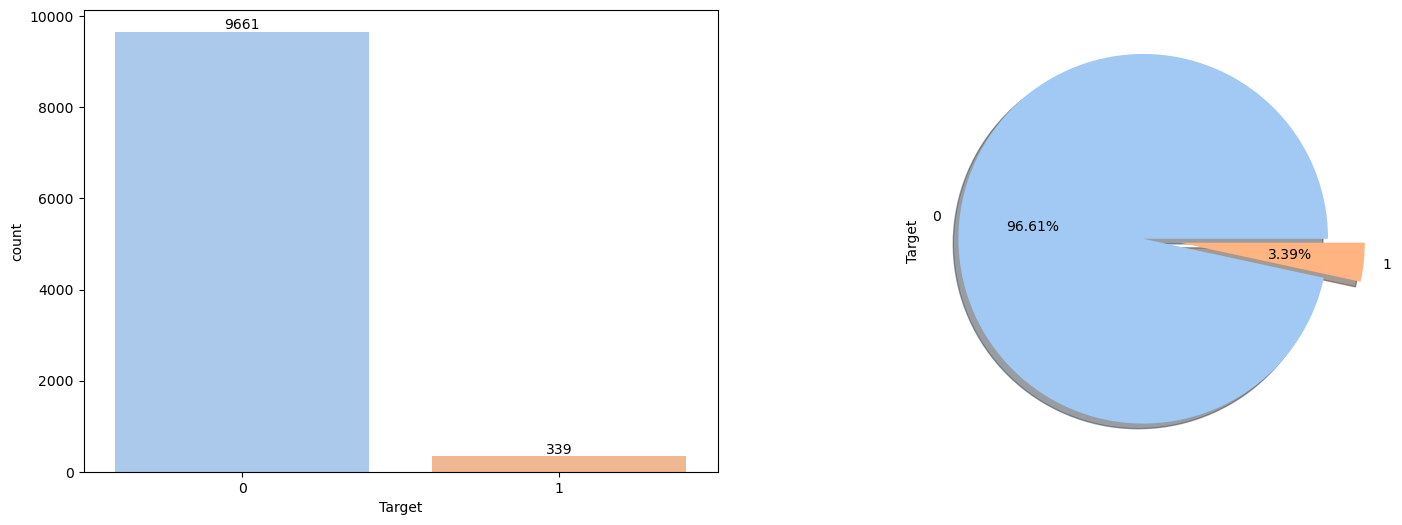

In [14]:
# Visualizar o Target
fig, axes = plt.subplots(figsize=(18, 6))
axes.set_title("Target", fontsize=20, color='Red', fontname='Times New Roman')

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Target', data=data, palette='pastel')
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(1, 2, 2)
data['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True, colors=sns.color_palette('pastel'), ax=ax2)

plt.show()

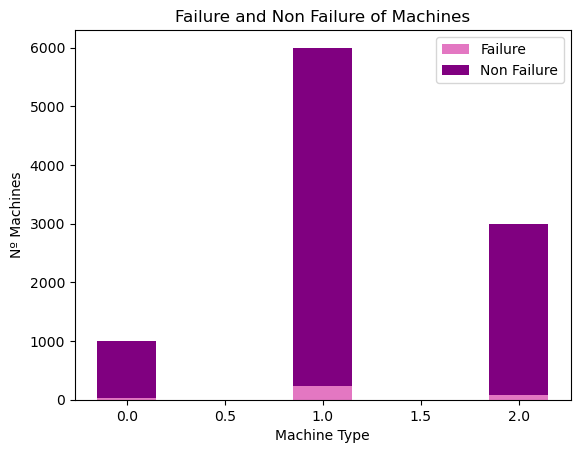

Percentagem de máquinas que falharam: (0): 0.2%
Percentagem de máquinas que não falharam: (0): 9.8%
Percentagem de máquinas que falharam: (1): 2.4%
Percentagem de máquinas que não falharam: (1): 57.6%
Percentagem de máquinas que falharam: (2): 0.8%
Percentagem de máquinas que não falharam: (2): 29.1%


In [15]:
# Bar Chart (verificar influência do tipo de máquina no facto de falhar ou não)

# Contagem de falhas por tipo de máquina
failures = data.groupby('Type')['Target'].sum()
non_failures = data.groupby('Type')['Target'].count() - failures

fig, ax = plt.subplots()
width = 0.3
labels = failures.index
ax.bar(labels, failures, width, label='Failure', color='tab:Pink')
ax.bar(labels, non_failures, width, bottom=failures, label='Non Failure', color='Purple')
ax.set_xlabel('Machine Type')
ax.set_ylabel('Nº Machines')
ax.set_title('Failure and Non Failure of Machines')

ax.legend()
plt.show()


# Cálculo das percentagens
total = failures.sum() + non_failures.sum()
percentagemF = failures * 100 / total
percentagemNF = non_failures * 100 / total

for machine_type in failures.index:
    print(f"Percentagem de máquinas que falharam: ({machine_type}): {percentagemF[machine_type]:.1f}%")
    print(f"Percentagem de máquinas que não falharam: ({machine_type}): {percentagemNF[machine_type]:.1f}%")


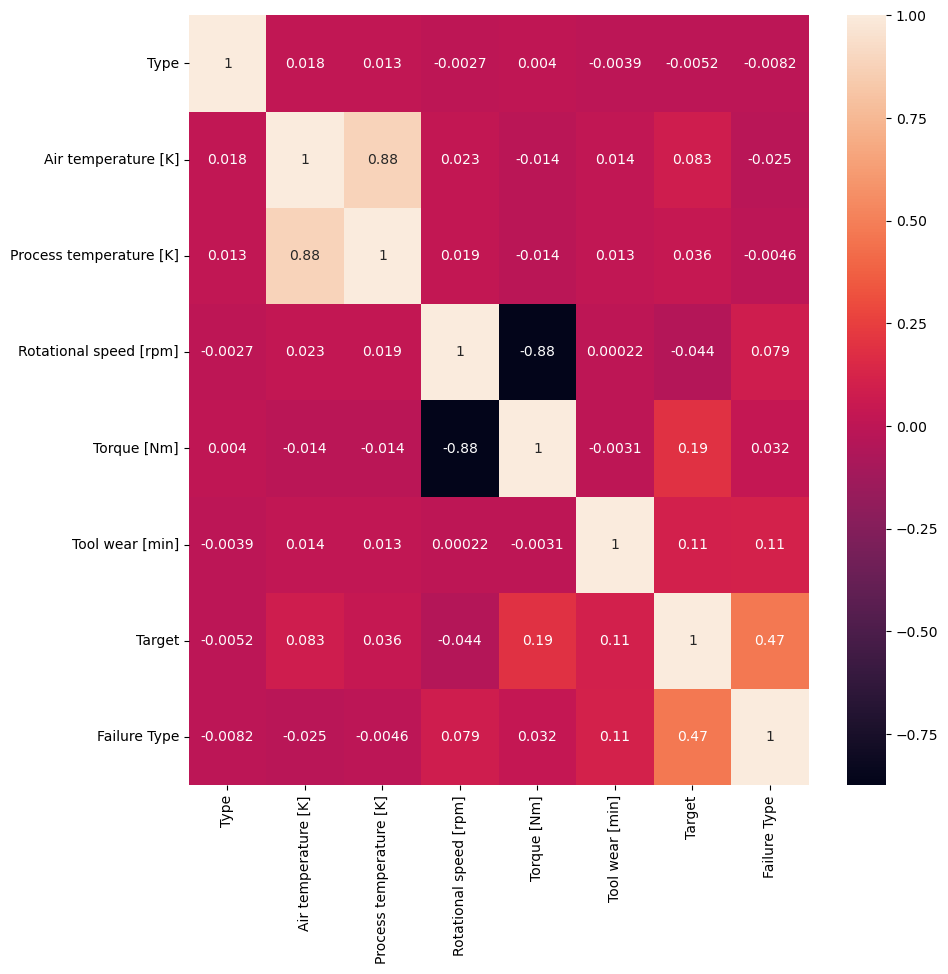

In [16]:
plt.figure(figsize=(10, 10))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

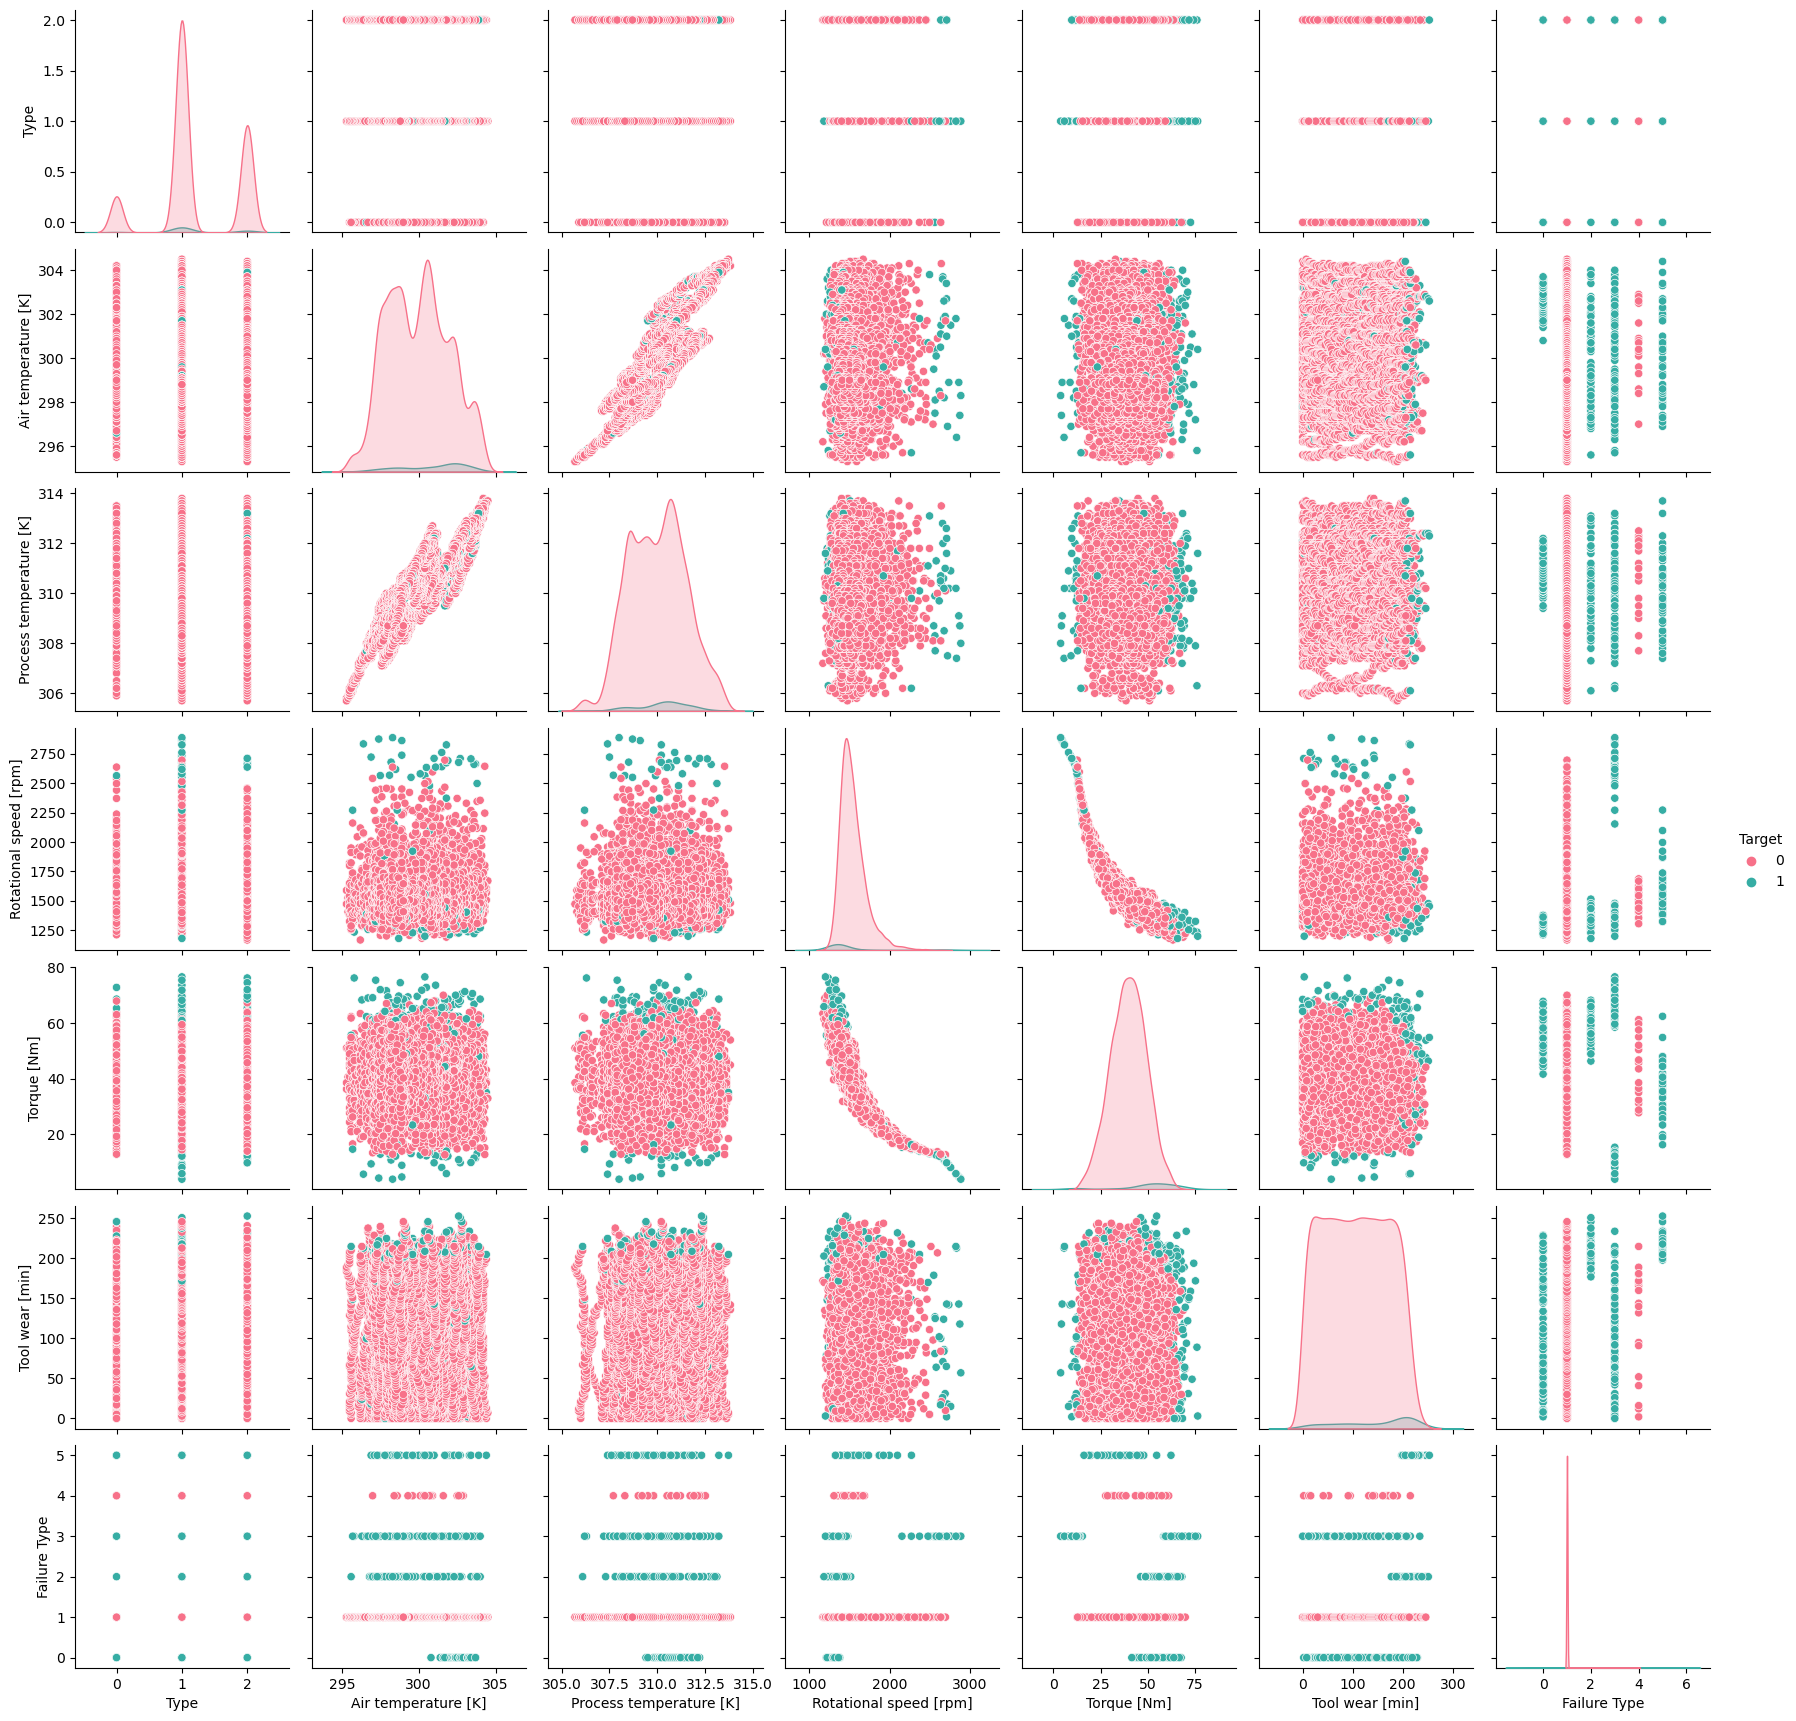

In [17]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='Target', palette='husl')
plt.show()

In [8]:
data_1 = data.drop(columns=['Rotational speed [rpm]','Process temperature [K]'])

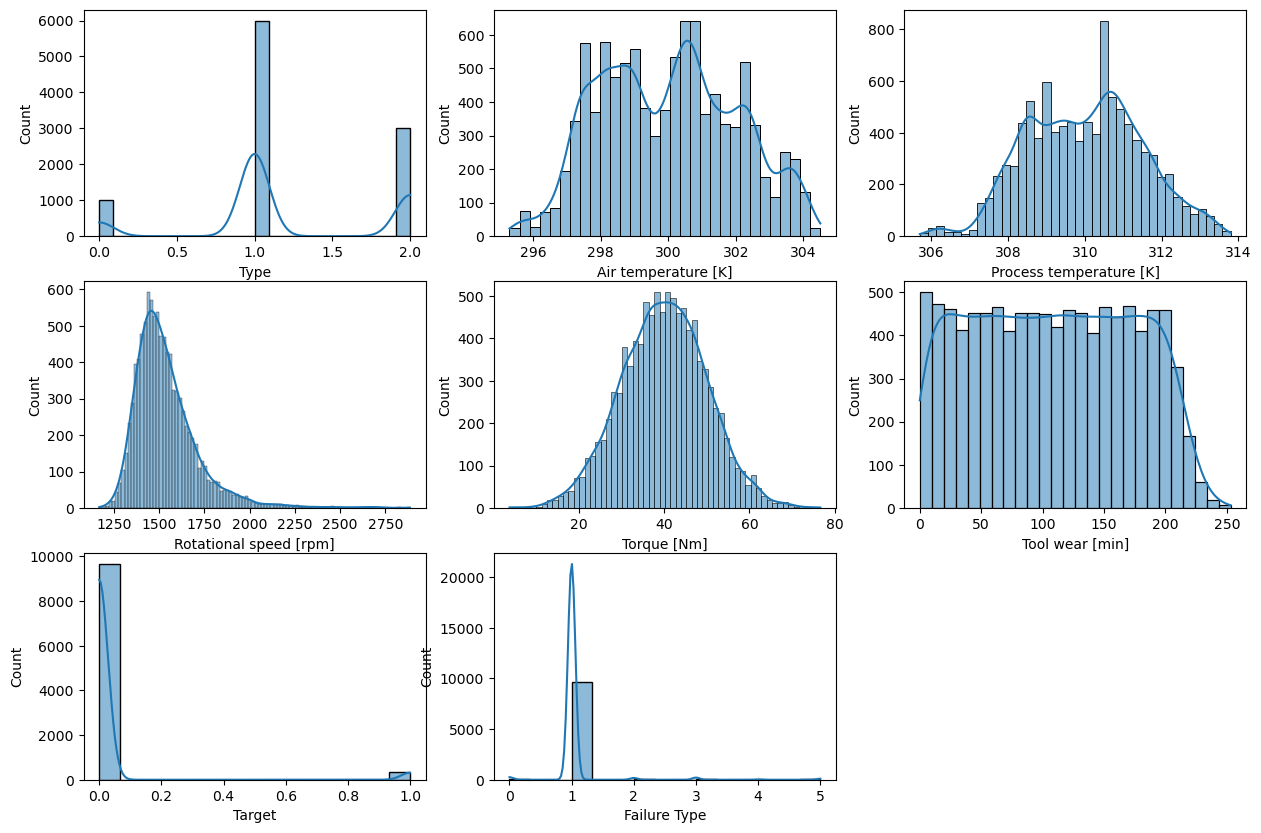

In [18]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)

 ## Experimental Analysis 
 * Binary Classifier - predict each instance as a failure (1) or not (0)
 * Multi-Class Problem - classify the type of failure as one of six: 'No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failures','Heat Dissipation Failure']
 * evaluate them in a testing set (hold out)

### Neural Networks

#### Scenario A (Binary Classifier)

In [9]:
from imblearn.over_sampling import SMOTE

C:\Users\alice\AppData\Local\Temp\ipykernel_27176\3447668015.py:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/50
647/647 [==============================] - 2s 2ms/step - loss: 0.6287 - accuracy: 0.6535
Epoch 2/50
647/647 [==============================] - 1s 1ms/step - loss: 0.5040 - accuracy: 0.8585
Epoch 3/50
647/647 [==============================] - 1s 1ms/step - loss: 0.3810 - accuracy: 0.9257
Epoch 4/50
647/647 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.9483
Epoch 5/50
647/647 [==============================] - 1s 1ms/step - loss: 0.2043 - accuracy: 0.9579
Epoch 6/50
647/647 [==============================] - 1s 1ms/step - loss: 0.1657 - accuracy: 0.9624
Epoch 7/50
647/647 [==============================] - 1s 2ms/step - loss: 0.1432 - accuracy: 0.9656
Epoch 8/50
647/647 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9674
Epoch 9/50
647/647 [==============================] - 1s 1ms/step - loss: 0.1208 - accuracy: 0.9679
Epoch 10/50
647/647 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.9693

C:\Users\alice\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


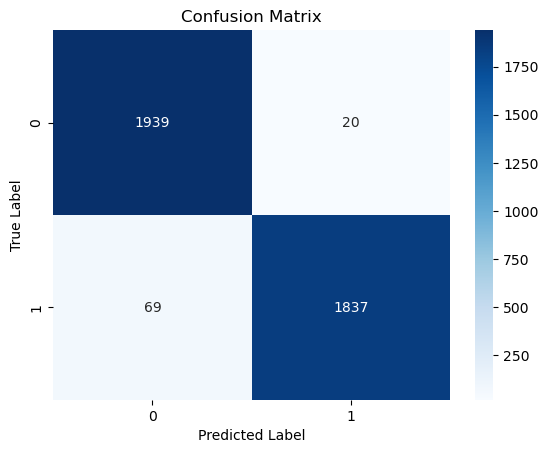

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1959
           1       0.99      0.96      0.98      1906

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

X = data.drop(columns=['Target'], axis=1)
y = data['Target']

# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Create the Neural Network model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search_result.best_estimator_


y_pred = best_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Convert true labels to original class labels
y_test = label_encoder.inverse_transform(y_test)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


#### Scenario B (Multi-Class Problem)

# CARO COMPUTACIONALMENTE

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop(columns=['Failure Type'], axis=1)
y = data['Failure Type']

# Label encoding para a variável alvo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encoding para as features categóricas
X_encoded = pd.get_dummies(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=21)

# Escalonar as features usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE aos dados de treinamento para tratar o desbalanceamento de classes
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Converter a variável alvo para categórica
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# modelo da rede neural
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# wrapper KerasClassifier para uso com o GridSearchCV
model = KerasClassifier(build_fn=create_model)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

best_model = grid_search_result.best_estimator_

y_pred = best_model.predict(X_test)

# Converter as previsões para rótulos de classe originais
y_pred = label_encoder.inverse_transform(y_pred)


# Converter os rótulos verdadeiros para rótulos de classe originais
y_test = label_encoder.inverse_transform(y_test.argmax(axis=1))

best_accuracy = grid_search.best_score_

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

classification_report = metrics.classification_report(y_test, y_pred)
print("Best Accuracy:", best_accuracy)
print("Classification Report:\n", classification_report)


Epoch 1/50


C:\Users\alice\AppData\Local\Temp\ipykernel_36836\1643292496.py:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


1933/1933 [==============================] - 4s 996us/step - loss: 0.7462 - accuracy: 0.8139
Epoch 2/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.2912 - accuracy: 0.9339
Epoch 3/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.2047 - accuracy: 0.9482
Epoch 4/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.1668 - accuracy: 0.9562
Epoch 5/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.1445 - accuracy: 0.9625
Epoch 6/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.1286 - accuracy: 0.9657
Epoch 7/50
1933/1933 [==============================] - 2s 985us/step - loss: 0.1157 - accuracy: 0.9692
Epoch 8/50
1933/1933 [==============================] - 2s 873us/step - loss: 0.1050 - accuracy: 0.9718
Epoch 9/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.0959 - accuracy: 0.9762
Epoch 10/50
1933/1933 [==============================] - 2s 1ms/step - loss: 0.0886 - a

KeyboardInterrupt: 

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.8100 - accuracy: 0.8650 - precision: 0.9769 - recall: 0.5013 
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9664 - precision: 0.9665 - recall: 0.9663
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9664 - precision: 0.9678 - recall: 0.9663
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9665 - precision: 0.9816 - recall: 0.9656
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9684 - precision: 0.9937 - recall: 0.9655
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9718 - precision: 0.9973 - recall: 0.9654
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9740 - precision: 0.9981 - recall: 0.9656
Epoch 8/100
250/250 [============

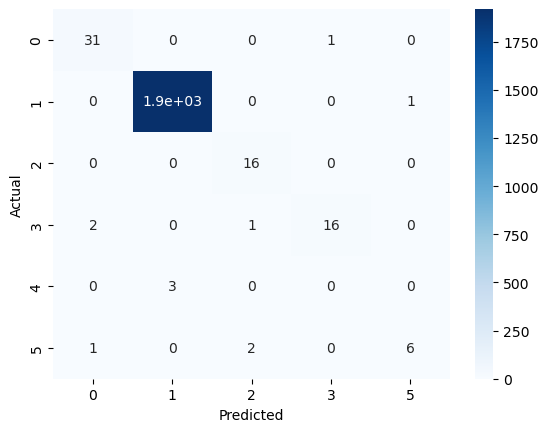

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from keras import metrics

X = data.drop(columns=['Failure Type'], axis=1)
y = data['Failure Type']

# label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# one-hot encoding for categorical features
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=21)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
model.fit(X_train, y_train, epochs=100, batch_size=32)


predictions = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Evaluate the model's performance
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test.argmax(axis=1), predicted_labels, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Suport Vector Machine 

#### Scenario A (Binary Classifier)

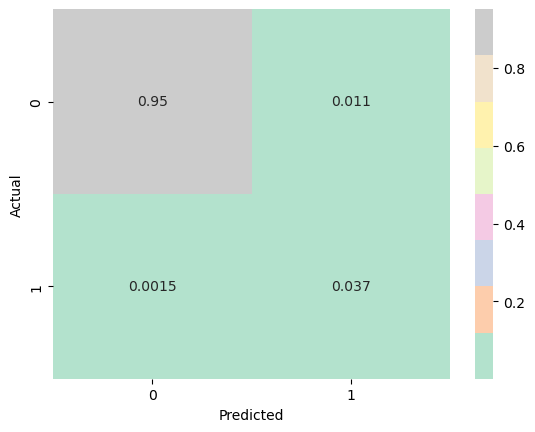

Best Accuracy: 0.9808090570447842
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1923
           1       0.77      0.96      0.86        77

    accuracy                           0.99      2000
   macro avg       0.88      0.97      0.92      2000
weighted avg       0.99      0.99      0.99      2000



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['Target'], axis=1)
y = data['Target']

# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC()

# Create Grid Search Cross Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Pastel2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model's performance
print("Best Accuracy:", best_accuracy)
print(classification_report(y_test, y_pred))


#### Scenario B (Multi Class Classifier)

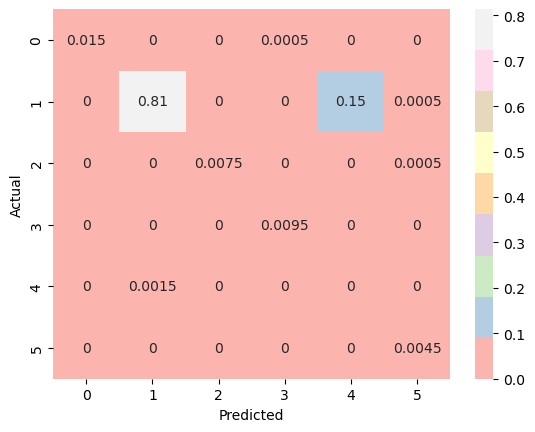

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      0.85      0.92      1921
           2       1.00      0.94      0.97        16
           3       0.95      1.00      0.97        19
           4       0.00      0.00      0.00         3
           5       0.82      1.00      0.90         9

    accuracy                           0.85      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       1.00      0.85      0.92      2000

Best Accuracy: 0.9667356529987496


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['Failure Type'], axis=1)
y = data['Failure Type']

# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE to the training data to balance the classes
sm = SMOTE(random_state=21)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


svm = SVC()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Pastel1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report and best accuracy
print(classification_report(y_test, y_pred))
print("Best Accuracy:", best_accuracy)


### Random Forest Classifier

#### Scenario A (Binary Classifier)

Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1923
           1       0.99      0.99      0.99        77

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



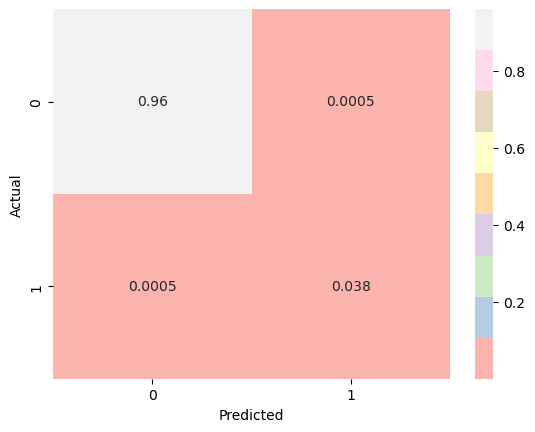

Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
Accuracy: 0.9981909431315825


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['Target'], axis=1)
y = data['Target']

# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Pastel1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc_grid.fit(X_train, y_train)

print('Best parameters:', rfc_grid.best_params_)
print('Accuracy:', rfc_grid.best_score_)


#### Scenario B (Multi Class Classifier)

Accuracy: 0.993


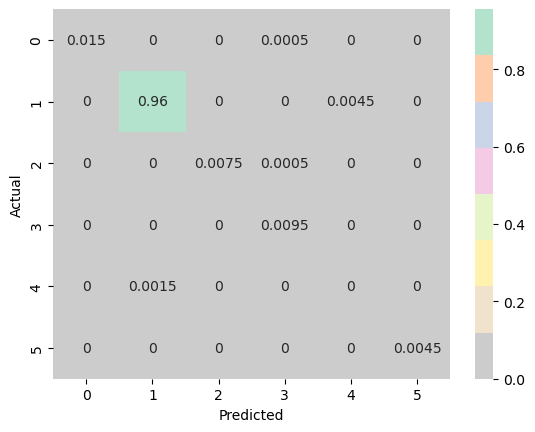

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00      1921
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95        19
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         9

    accuracy                           0.99      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       1.00      0.99      0.99      2000

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
Accuracy: 0.9979950972677457


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['Failure Type'], axis=1)
y = data['Failure Type']

# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply SMOTE to the training data
oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Pastel2_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification Report:\n', classification_report(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc_grid.fit(X_train, y_train)

print('Best parameters:', rfc_grid.best_params_)
print('Accuracy:', rfc_grid.best_score_)
